<a href="https://colab.research.google.com/github/Vannod/SistemasFyC/blob/main/Tarea_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis bursátil

Realizar un programa en Python que consultando una base de datos (la que
usted prefiera) calcule SMA, WMA y EMA de un menú de acciones.

## Librerías

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Acciones

*   Kohl's Corporation (KSS)
*   Best Buy (BBY)
*   General Motors Company (GM)



Escoja un activo
1. KSS
2. BBY
3. GM
4. Salir
Ingrese una opción: 2


[*********************100%***********************]  1 of 1 completed
<ipython-input-46-5c49d3c430ac>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_activo['SMA_CP'] = SMA(datos_activo, 50) # Corto plazo (50 días)
<ipython-input-46-5c49d3c430ac>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_activo['SMA_LP'] = SMA(datos_activo, 200) # Largo plazo (200 días)
<ipython-input-46-5c49d3c430ac>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi


BBY:
Price                          Close   SMA_CP    SMA_LP     WMA_CP     EMA_CP
Date                                                                         
2024-10-25 00:00:00+00:00  92.680000  96.0758  83.60265  95.852714  96.067679
2024-10-28 00:00:00+00:00  91.540001  96.2018  83.68710  95.310905  95.636472
2024-10-29 00:00:00+00:00  89.970001  96.3004  83.76765  94.675571  95.096808
2024-10-30 00:00:00+00:00  90.410004  96.4138  83.86040  94.136334  94.650446
2024-10-31 00:00:00+00:00  90.430000  96.4816  83.95685  93.643286  94.248498
Ingrese una opción: 


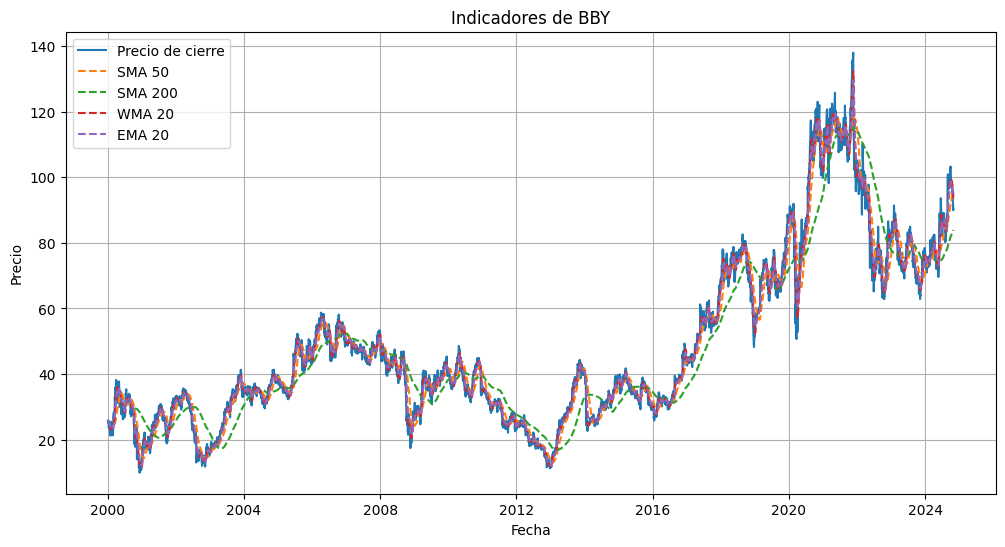

Escoja un activo
1. KSS
2. BBY
3. GM
4. Salir
Opción inválida
Escoja un activo
1. KSS
2. BBY
3. GM
4. Salir
Ingrese una opción: 4


In [46]:
activos = ['KSS', 'BBY', 'GM']

data_source = 'yahoo'
start_date = '2000-01-01'
end_date = '2024-11-01'

def SMA(datos, ventana):
    return datos['Close'].rolling(window=ventana).mean()

def WMA(datos, ventana):
    pesos = np.arange(1, ventana + 1)
    return datos['Close'].rolling(window=ventana).apply(lambda x: np.sum(x * pesos) / np.sum(pesos), raw=True)

def EMA(datos, ventana):
    return datos['Close'].ewm(span=ventana, adjust=False).mean()

def indicadores(activos):
    datos = yf.download(activos, start=start_date, end=end_date, group_by='ticker')

    for activo in activos:
        datos_activo = datos[activo]

        # Indicadores

        # SMA
        datos_activo['SMA_CP'] = SMA(datos_activo, 50) # Corto plazo (50 días)
        datos_activo['SMA_LP'] = SMA(datos_activo, 200) # Largo plazo (200 días)

        # WMA
        datos_activo['WMA_CP'] = WMA(datos_activo, 20) # Corto plazo (20 días)

        # EMA
        datos_activo['EMA_CP'] = EMA(datos_activo, 20) # Corto plazo (20 días)

        # Mostrar los últimos datos calculados
        print(f"\n{activo}:")
        print(datos_activo[['Close', 'SMA_CP', 'SMA_LP', 'WMA_CP', 'EMA_CP']].tail())

        # Graficar SMA
        plt.figure(figsize=(12, 6))
        plt.plot(datos_activo['Close'], label='Precio de cierre')
        plt.plot(datos_activo['SMA_CP'], label='SMA 50', linestyle='--') # Graficar SMA
        plt.plot(datos_activo['SMA_LP'], label='SMA 200', linestyle='--')
        plt.plot(datos_activo['WMA_CP'], label='WMA 20', linestyle='--')
        plt.plot(datos_activo['EMA_CP'], label='EMA 20', linestyle='--')
        plt.title(f'Indicadores de {activo}')
        plt.xlabel('Fecha')
        plt.ylabel('Precio')
        plt.legend()
        plt.grid()
        plt.show()



def menu(acciones):
  for i in range(len(activos)):
    print(f'{i+1}. {activos[i]}')
  print('4. Salir')4

while True:
  print('Escoja un activo')
  menu(acciones)
  opcion = input('Ingrese una opción: ')
  if opcion == 4:
    break

  try:
    opcion = int(opcion)
    if opcion == 1:
      indicadores([acciones[0]])
    elif opcion == 2:
      indicadores([acciones[1]])
    elif opcion == 3:
      indicadores([acciones[2]])
    elif opcion == 4:
      break
    else:
      print('Opción inválida')
  except:
    print('Opción inválida')